# MPMS rock magnetic experiments data analysis

## Import scientific python libraries

In [231]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

%matplotlib inline

## Import data

In [232]:
NED2_8c_MPMS = pd.read_csv('./MPMS_data/NED2_8c_MPMS.csv')
NED2_8c_MPMS.head()

,experiment,T [K],Bapp [T],M [Am2/kg],reg fit,timestamp
0,FC,9.994304,0,0.015529,0.984894,1/8/2020 9:39:53 PM
1,FC,15.500260,0,0.014205,0.984457,1/8/2020 9:41:15 PM
2,FC,20.576900,0,0.013058,0.984438,1/8/2020 9:42:16 PM
3,FC,25.597500,0,0.012188,0.984445,1/8/2020 9:43:18 PM
4,FC,30.620950,0,0.011418,0.984483,1/8/2020 9:44:18 PM


In [233]:
def parse_MPMS_data(MPMS):
    if 'FC' in MPMS.experiment.unique():
        MPMS_FC = MPMS[MPMS.experiment == 'FC']
    if 'ZFC' in MPMS.experiment.unique():   
        MPMS_ZFC = MPMS[MPMS.experiment == 'ZFC']
    if 'RTSIRM_cooling' in MPMS.experiment.unique():
        MPMS_RTSIRM_cool = MPMS[MPMS.experiment == 'RTSIRM_cooling']
    if 'RTSIRM_warming' in MPMS.experiment.unique():
        MPMS_RTSIRM_warm = MPMS[MPMS.experiment == 'RTSIRM_warming']
    return MPMS_FC, MPMS_ZFC, MPMS_RTSIRM_cool, MPMS_RTSIRM_warm

def plot_mpms_dc(csv_file):
    MPMS = pd.read_csv(csv_file)
    MPMS_FC, MPMS_ZFC, MPMS_RTSIRM_cool, MPMS_RTSIRM_warm = parse_MPMS_data(MPMS)
    
    fig = plt.figure(figsize=(9,4.5))
    ax0 = fig.add_subplot(1,2,1)
    ax0.plot(MPMS_FC['T [K]'],MPMS_FC['M [Am2/kg]'],'.-',color='C1',label='FC')
    ax0.plot(MPMS_ZFC['T [K]'],MPMS_ZFC['M [Am2/kg]'],'.-',color='C2',label='ZFC')
    ax0.set_xlim(0,300)
    ax0.set_ylabel('M (Am2/kg)')
    ax0.legend()
    
    ax1 = plt.subplot(1,2,2)
    ax1.plot(MPMS_RTSIRM_cool['T [K]'],MPMS_RTSIRM_cool['M [Am2/kg]'],'.-',color='C0',label='RTSIRM cooling')
    ax1.plot(MPMS_RTSIRM_warm['T [K]'],MPMS_RTSIRM_warm['M [Am2/kg]'],'.-',color='C3',label='RTSIRM warming')
    ax1.set_xlim(0,300)
    ax1.set_ylabel('M (Am2/kg)')
    ax1.set_xlabel('T (K)')
    ax1.legend()
    
    fig.tight_layout()
    
    return fig

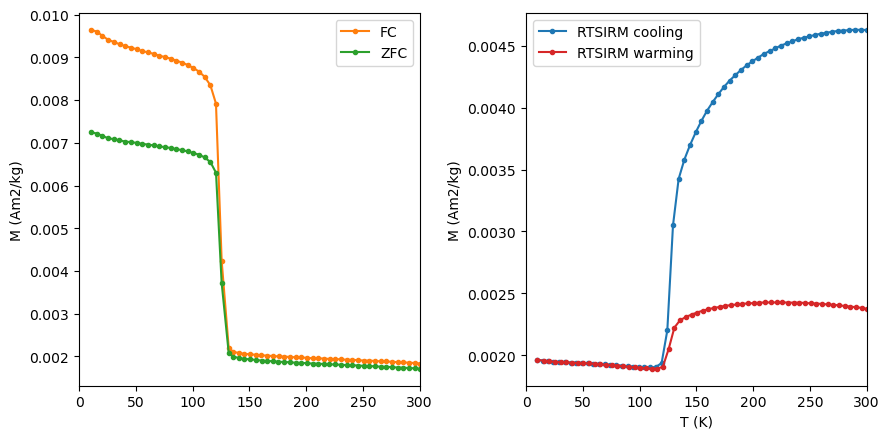

In [234]:
fig = plot_mpms_dc('./MPMS_data/NED34_6c_MPMS.csv')

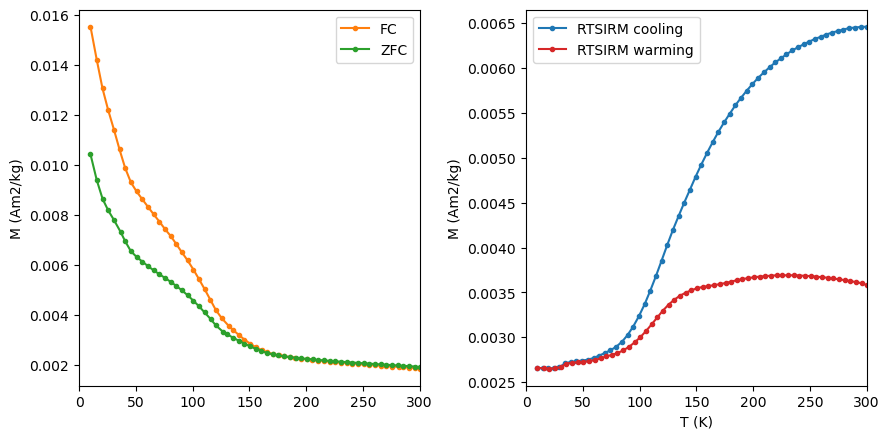

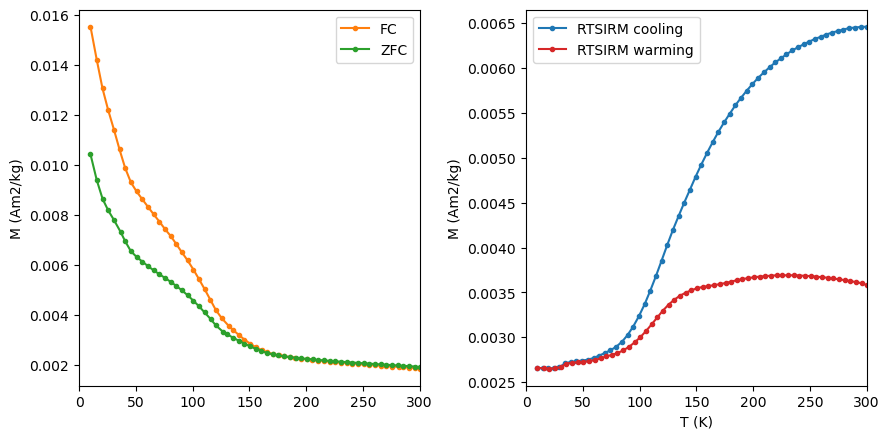

In [235]:
plot_mpms_dc('./MPMS_data/NED2_8c_MPMS.csv')

Its important to evaluate the derivative

In [236]:
def mpms_derivative(csv_file):
    MPMS = pd.read_csv(csv_file)
    MPMS_FC, MPMS_ZFC, MPMS_RTSIRM_cool, MPMS_RTSIRM_warm = parse_MPMS_data(MPMS)

    #calculate the derivative of each derivative of the 
    #Calculating the derivative is by finding the difference between the values on the y-axis, and dividing it by the values on the x-axis.

    MPMS_FC['dM/dT [AM2/kgK]'] = (MPMS_FC['M [Am2/kg]'].diff()/2)/(MPMS_FC['T [K]'].diff()/2)
    MPMS_ZFC['dM/dT [AM2/kgK]'] = (MPMS_ZFC['M [Am2/kg]'].diff()/2)/(MPMS_ZFC['T [K]'].diff()/2)
    MPMS_RTSIRM_cool['dM/dT [AM2/kgK]'] = (MPMS_RTSIRM_cool['M [Am2/kg]'].diff()/2)/(MPMS_RTSIRM_cool['T [K]'].diff()/2)
    MPMS_RTSIRM_warm['dM/dT [AM2/kgK]'] = (MPMS_RTSIRM_warm['M [Am2/kg]'].diff()/2)/(MPMS_RTSIRM_warm['T [K]'].diff()/2)


    #plot the mpms_derivative of each curve
    #Take the middle points  of dy and dx to represent the data
        
    fig = plt.figure(figsize=(9,4.5))
    ax2 = fig.add_subplot(1,2,1)
    ax2.plot(MPMS_FC['T [K]'],MPMS_FC['dM/dT [AM2/kgK]'] ,'.-',color='C1',label='FC derivative')
    ax2.plot(MPMS_ZFC['T [K]'],MPMS_ZFC['dM/dT [AM2/kgK]'],'.-',color='C2',label='ZFC derivative')
    ax2.set_xlim(0,300)
    ax2.set_xlabel('T[K]')
    ax2.set_ylabel('dM/dT [AM2/kgK]')
    ax2.legend()
    
    ax3 = plt.subplot(1,2,2)
    ax3.plot(MPMS_RTSIRM_cool['T [K]'],MPMS_RTSIRM_cool['dM/dT [AM2/kgK]'],'.-',color='C0',label='RTSIRM coolin derivative')
    ax3.plot(MPMS_RTSIRM_warm['T [K]'],MPMS_RTSIRM_warm['dM/dT [AM2/kgK]'],'.-',color='C3',label='RTSIRM warming derivative')
    ax3.set_xlim(0,300)
    ax3.set_ylabel('dM/dT [AM2/kgK]')
    ax3.set_xlabel('T (K)')
    ax3.legend()

    fig.tight_layout()



    #Show where the peak is for both the graphs

    def local_min()
    x2_0 = MPMS_FC['T [K]'].values.tolist()
    y2_0 = MPMS_FC['dM/dT [AM2/kgK]'].values.tolist()
    y2_0 = [y2 for y2 in y2_0 if str(y2) != 'nan']
    ymax2_0 = min(y2_0)
    xpos2_0 = y2_0.index(ymax2_0)
    xmax2_0 = x2_0[xpos2_0]
    print(xmax2_0, ymax2_0)

    text= "x={:.3f}, y={:.3f}".format(xmax2_0, ymax2_0)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax2.annotate(text, xy=(xmax2_0, ymax2_0), xytext=(0.,0.96), **kw)

    #Make a line of the best fit for each individual curve on the graph

    return fig
    
    

120.5073 -0.0007334524734524732


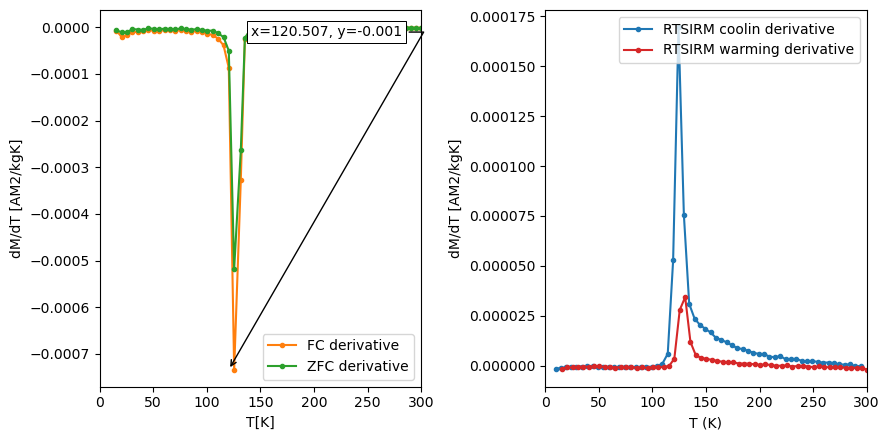

In [237]:
fig = mpms_derivative('./MPMS_data/NED34_6c_MPMS.csv')

9.994304 -0.0002404459824960461


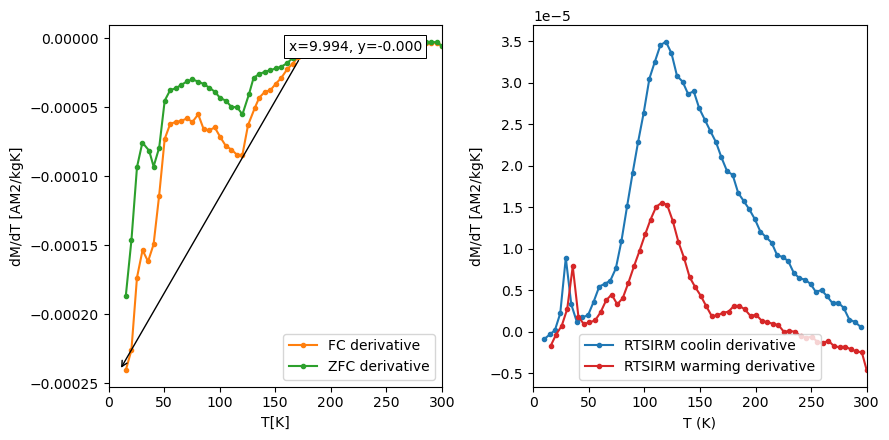

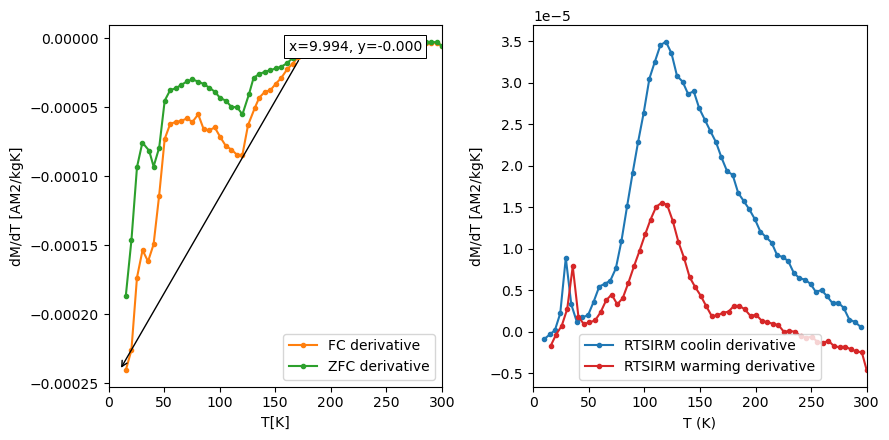

In [238]:
mpms_derivative('./MPMS_data/NED2_8c_MPMS.csv')